In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [8]:
df = pd.read_csv("creditcard.csv")
#df.info
df_without_na = df.dropna()
df_without_duplicate = df.drop_duplicates()
print(df.shape)
df.head(10)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [9]:
df_without_v = df[["Time", "Amount", "Class"]]
df_without_v.head(10)
#df_without_v.info

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
5,2.0,3.67,0
6,4.0,4.99,0
7,7.0,40.80,0
8,7.0,93.20,0
9,9.0,3.68,0


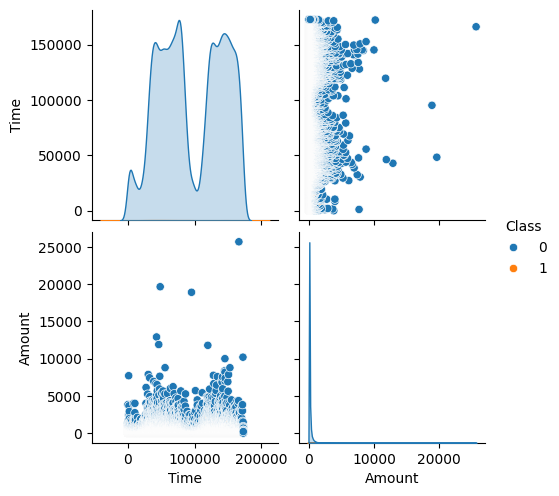

In [10]:
sn.pairplot(df_without_v, hue='Class')

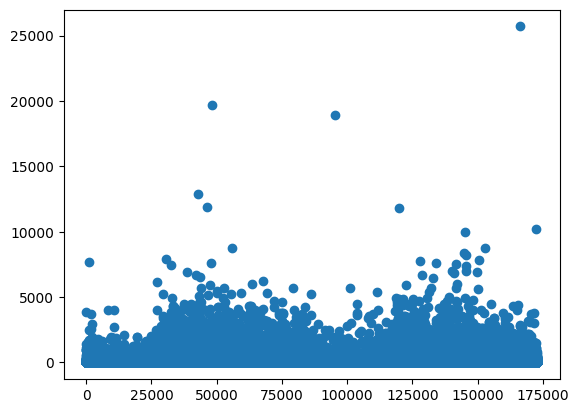

In [11]:
plt.scatter(df_without_v["Time"],df_without_v["Amount"])
plt.show()

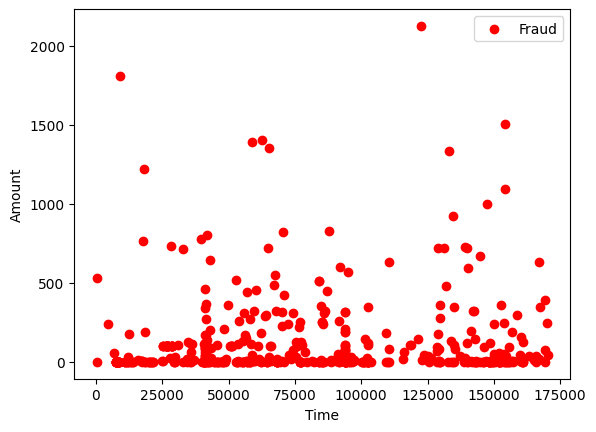

In [12]:
#plt.scatter(df["Time"], df["Amount"], color='blue', label='Non-fraud')
df_class_1 = df[df['Class'] == 1]
plt.scatter(df_class_1["Time"],df_class_1["Amount"], color='red', label='Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()

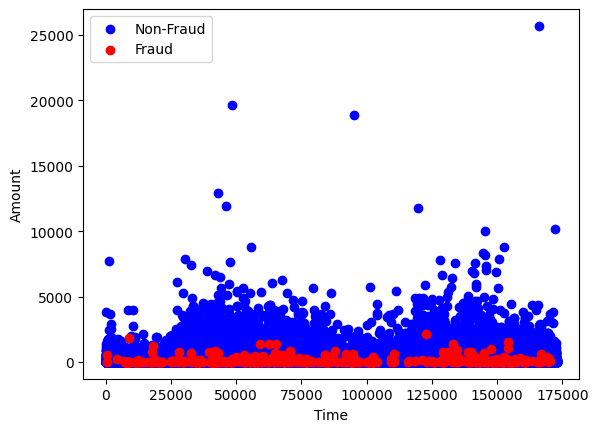

In [13]:
df_class_1 = df[df['Class'] == 1]
df_class_0 = df[df['Class'] == 0]
plt.scatter(df_class_0["Time"],df_class_0["Amount"], color='blue', label='Non-Fraud')
plt.scatter(df_class_1["Time"],df_class_1["Amount"], color='red', label='Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()

First, we can see with simple EDA, there are outliners that we can't really delete, the dataset is really unbalanced and we can't really know what is inside the V column.

In [14]:
df_with_6v = df[["Time", "Amount", "Class","V1","V2","V3","V4","V5","V6"]]
df_with_6v.head(10)

,Time,Amount,Class,V1,V2,V3,V4,V5,V6
0,0.0,149.62,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388
1,0.0,2.69,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361
2,1.0,378.66,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499
3,1.0,123.50,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203
4,2.0,69.99,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921
5,2.0,3.67,0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728
6,4.0,4.99,0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708
7,7.0,40.80,0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118
8,7.0,93.20,0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818
9,9.0,3.68,0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761


<Axes: >

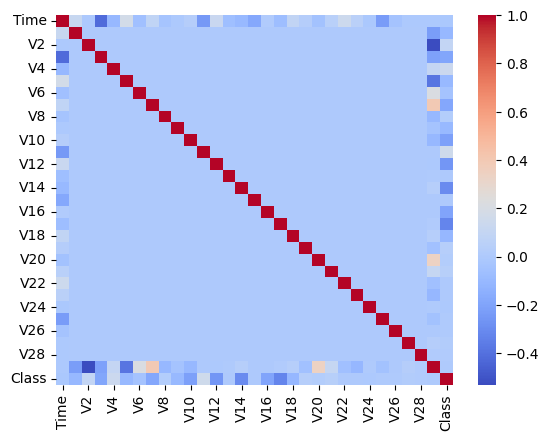

In [15]:
corr = df.corr(numeric_only=True)
sn.heatmap(corr, cmap='coolwarm')

<Axes: >

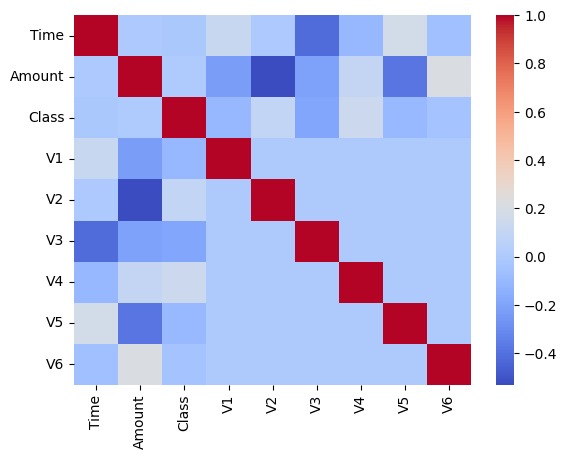

In [16]:
corr = df_with_6v.corr(numeric_only=True)
sn.heatmap(corr, cmap='coolwarm')

In [17]:
X = df.drop("Class",axis=1)
y = df["Class"]
print((y==1).sum())
print(y.shape)

492
(284807,)


In [32]:
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.feature_selection import chi2, SelectKBest, f_classif, f_regression, mutual_info_classif, mutual_info_regression, SelectFromModel, RFE, RFECV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestRegressor, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, precision_score, classification_report, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from catboost import CatBoostClassifier
from scipy.stats import randint, uniform
import optuna
import tqdm as notebook_tqdm

In [ ]:
# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


In [36]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [38]:
print("X_train : ", X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)

X_train :  (213605, 30)
y_train :  (213605,)
X_test :  (71202, 30)
y_test :  (71202,)


Creation of little part of the dataset to test the best model to optimize for prediction

Application of SMOTE (Over-sampling)

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Classe avant SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Classe après SMOTE:", Counter(y_train_resampled))

X_resampled,_, y_resampled, _ = train_test_split(X_train_resampled, y_train_resampled, stratify=y_train_resampled,train_size=0.5, random_state=42)

print(X_resampled.shape)
print(y_resampled.shape)

Classe avant SMOTE: Counter({0: 213236, 1: 369})
Classe après SMOTE: Counter({0: 213236, 1: 213236})
(213236, 30)
(213236,)


In [40]:
models = {
    "LighBoost Classifier :" : LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
    #"Hist Gradient Boosting Classifier : " : HistGradientBoostingClassifier(random_state=42),
    #"Cat Boost : " : CatBoostClassifier(random_state=2)
}

for name, model in models.items():
    print(f"Modèle en cours : {name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
    print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred):.3f}")
    print(f"PR AUC: {average_precision_score(y_test, y_pred):.3f}")
    print(classification_report(y_test, y_pred, digits=3))
    print("------")


Modèle en cours : LighBoost Classifier :
[LightGBM] [Info] Number of positive: 213236, number of negative: 213236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 426472, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Precision: 0.658
Recall: 0.846
F1 Score: 0.740
ROC_AUC Score: 0.922
PR AUC: 0.557
              precision    recall  f1-score   support

           0      1.000     0.999     0.999     71079
           1      0.658     0.846     0.740       123

    accuracy                          0.999     71202
   macro avg      0.829     0.922     0.870     71202
weighted avg      0.999     0.999     0.999     71202

------
Modèle en cours : XGBoost
Precision: 0.810
Recall: 0.829
F1 Score: 0.819
ROC_AUC Score: 0.914
PR AUC:

XGBoost

In [42]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred):.3f}")
print(f"PR AUC: {average_precision_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, digits=3))
print("------")

Precision: 0.913
Recall: 0.764
F1 Score: 0.832
ROC_AUC Score: 0.882
PR AUC: 0.698
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     71079
           1      0.913     0.764     0.832       123

    accuracy                          0.999     71202
   macro avg      0.956     0.882     0.916     71202
weighted avg      0.999     0.999     0.999     71202

------


Optimisation of XGBoost

In [56]:
# Définir la fonction objectif
def objective(trial):
    # Définir les hyperparamètres à optimiser
    params = {
        'max_depth': trial.suggest_int("max_depth", 3, 12),
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3),
        'n_estimators': trial.suggest_int("n_estimators", 100, 1000),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'scale_pos_weight': trial.suggest_float("scale_pos_weight", 1, 20),
        'random_rate': 42
    }


    # Créer le modèle
    model = XGBClassifier(**params)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # Évaluer le modèle
    #score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3)
    

    return precision_score(y_test, y_pred)

# Créer une étude
study = optuna.create_study(direction='maximize')

# Optimiser la fonction objectif
study.optimize(objective, n_trials=100)

# Afficher les résultats
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2025-08-03 17:37:19,942] A new study created in memory with name: no-name-d0f62b85-bafd-40b9-add2-b36c61b7c912
[I 2025-08-03 17:37:26,576] Trial 0 finished with value: 0.9333333333333333 and parameters: {'max_depth': 12, 'learning_rate': 0.23475955970107945, 'n_estimators': 731, 'subsample': 0.9813247136612231, 'colsample_bytree': 0.8231868787993628, 'scale_pos_weight': 1.0033884143663943}. Best is trial 0 with value: 0.9333333333333333.
[I 2025-08-03 17:37:28,741] Trial 1 finished with value: 0.9090909090909091 and parameters: {'max_depth': 5, 'learning_rate': 0.16740467685173513, 'n_estimators': 199, 'subsample': 0.9463058340549795, 'colsample_bytree': 0.5300765728657288, 'scale_pos_weight': 9.357507833438415}. Best is trial 0 with value: 0.9333333333333333.
[I 2025-08-03 17:37:36,471] Trial 2 finished with value: 0.9345794392523364 and parameters: {'max_depth': 12, 'learning_rate': 0.24058248762712414, 'n_estimators': 827, 'subsample': 0.5243810450156037, 'colsample_bytree': 0.78

Best trial:
  Value: 0.970873786407767
  Params: 
    max_depth: 9
    learning_rate: 0.24474552856185788
    n_estimators: 823
    subsample: 0.7678665990669592
    colsample_bytree: 0.6394395082216124
    scale_pos_weight: 1.1210220304638547


In [57]:
best_params = study.best_params
final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred):.3f}")
print(f"PR AUC: {average_precision_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, digits=3))
print("------")

Precision: 0.971
Recall: 0.813
F1 Score: 0.885
ROC_AUC Score: 0.906
PR AUC: 0.790
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     71079
           1      0.971     0.813     0.885       123

    accuracy                          1.000     71202
   macro avg      0.985     0.906     0.942     71202
weighted avg      1.000     1.000     1.000     71202

------


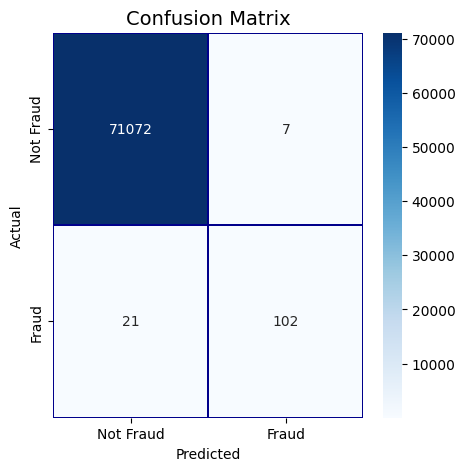

In [55]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sn.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            fmt='d',
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()